<center><h1>Prédiction de résiliation d'abonnement </h1></center>
<center><h4>Elaboré par: Ben mabrouk Bechir</h4><center>

### Importation des bibliothèques


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from collections import Counter 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency 
from sklearn.feature_selection import RFECV, SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold,GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score,fbeta_score, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Exploration des données

In [2]:
df = pd.read_csv("churn-bigml-80.csv")


In [3]:
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Cela indique qu'il faut normaliser les données car ils ont des échelles différentes

In [6]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in State: 51
Number of unique values in Account length: 205
Number of unique values in Area code: 3
Number of unique values in International plan: 2
Number of unique values in Voice mail plan: 2
Number of unique values in Number vmail messages: 42
Number of unique values in Total day minutes: 1489
Number of unique values in Total day calls: 115
Number of unique values in Total day charge: 1489
Number of unique values in Total eve minutes: 1442
Number of unique values in Total eve calls: 120
Number of unique values in Total eve charge: 1301
Number of unique values in Total night minutes: 1444
Number of unique values in Total night calls: 118
Number of unique values in Total night charge: 885
Number of unique values in Total intl minutes: 158
Number of unique values in Total intl calls: 21
Number of unique values in Total intl charge: 158
Number of unique values in Customer service calls: 10
Number of unique values in Churn: 2


In [7]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

<Axes: xlabel='Churn', ylabel='count'>

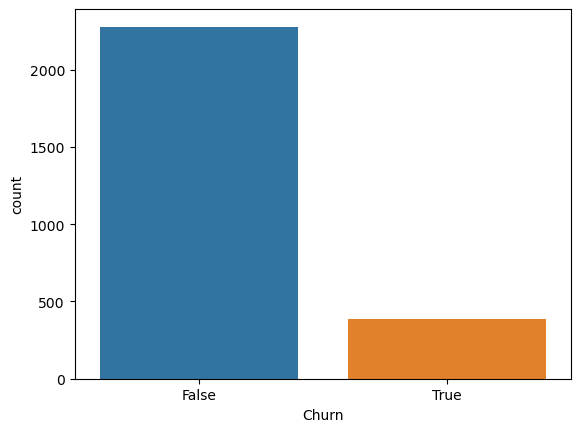

In [8]:
sns.countplot(data = df, x = "Churn")


Nous pouvons constater que nos données sont déséquilibrées, donc nous pourrions avoir besoin d'utiliser certaines techniques de rééquilibrage des données. Nous allons essayer de travailler avec les données telles qu'elles sont, puis expérimenter différentes techniques de rééquilibrage des données pour voir si elles améliorent ou non les performances du modèle.

### Tests de significativité

In [9]:
def chi_2_test(df, col2,col1 = "Churn"):
    data = pd.crosstab(df[col1], df[col2], rownames=[col1], colnames=[col2])
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p_value = " + str(p))
    if p <= alpha:
        print(f"{col2} and {col1} sont dépendantes!")
    else : 
        print(f"{col2} and {col1} sont indépendantes!")

In [10]:
chi_2_test(df,"State")

p_value = 0.004680701679944943
State and Churn sont dépendantes!


Comme il y a trop de "State" à inclure, nous allons les résumer dans une variable plus courte mais significative qui apporte autant d'informations.

In [11]:
tab = pd.crosstab(df["Churn"], df["State"], rownames=['Churn'], colnames=['State'], normalize = "columns")
tab.T

Churn,False,True
State,,
AK,0.930233,0.069767
AL,0.893939,0.106061
AR,0.765957,0.234043
AZ,0.933333,0.066667
CA,0.791667,0.208333
CO,0.881356,0.118644
CT,0.813559,0.186441
DC,0.888889,0.111111
DE,0.843137,0.156863


In [12]:
churn_more10 = list(tab.iloc[1][((tab.iloc[1] > 0.1) & (tab.iloc[1] < 0.2))].index)
churn_more20 = list(tab.iloc[1][(tab.iloc[1] > 0.2)].index)
churn_less10 = list(tab.iloc[1][tab.iloc[1] < 0.1].index)

In [13]:
df["State"].replace(churn_less10,0, inplace = True)
df["State"].replace(churn_more10,1, inplace = True)
df["State"].replace(churn_more20,2, inplace = True)

In [14]:
chi_2_test(df,"State")

p_value = 3.164053922894711e-15
State and Churn sont dépendantes!


In [15]:
for i in df.columns:
    chi_2_test(df,i)

p_value = 3.164053922894711e-15
State and Churn sont dépendantes!
p_value = 0.5923300290308106
Account length and Churn sont indépendantes!
p_value = 0.9056446754773072
Area code and Churn sont indépendantes!
p_value = 5.4269405491147075e-46
International plan and Churn sont dépendantes!
p_value = 4.079713016862758e-07
Voice mail plan and Churn sont dépendantes!
p_value = 0.05266212766121888
Number vmail messages and Churn sont indépendantes!
p_value = 9.247485433321067e-05
Total day minutes and Churn sont dépendantes!
p_value = 0.15137625502370747
Total day calls and Churn sont indépendantes!
p_value = 9.247485433321067e-05
Total day charge and Churn sont dépendantes!
p_value = 0.4714797462294521
Total eve minutes and Churn sont indépendantes!
p_value = 0.9642045376145331
Total eve calls and Churn sont indépendantes!
p_value = 0.44775798022997115
Total eve charge and Churn sont indépendantes!
p_value = 0.6906822874375335
Total night minutes and Churn sont indépendantes!
p_value = 0.48

### Analyse des variables quantitatives

In [16]:
num_cols = ["Account length",
    "Number vmail messages",
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

In [17]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in State: 3
Number of unique values in Account length: 205
Number of unique values in Area code: 3
Number of unique values in International plan: 2
Number of unique values in Voice mail plan: 2
Number of unique values in Number vmail messages: 42
Number of unique values in Total day minutes: 1489
Number of unique values in Total day calls: 115
Number of unique values in Total day charge: 1489
Number of unique values in Total eve minutes: 1442
Number of unique values in Total eve calls: 120
Number of unique values in Total eve charge: 1301
Number of unique values in Total night minutes: 1444
Number of unique values in Total night calls: 118
Number of unique values in Total night charge: 885
Number of unique values in Total intl minutes: 158
Number of unique values in Total intl calls: 21
Number of unique values in Total intl charge: 158
Number of unique values in Customer service calls: 10
Number of unique values in Churn: 2


In [18]:
def out_zscore(data):
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return set(outliers)

In [19]:
for col in num_cols:
    print(f"Outliers de {col} sont: ",out_zscore(df[col]))

Outliers de Account length sont:  {224, 225, 243, 221}
Outliers de Number vmail messages sont:  {50}
Outliers de Total day minutes sont:  {0.0, 2.6, 7.9, 7.8, 12.5, 345.3, 346.8, 350.8}
Outliers de Total day calls sont:  {40, 0, 36}
Outliers de Total day charge sont:  {0.0, 1.34, 2.13, 0.44, 58.7, 1.33, 58.96, 59.64}
Outliers de Total eve minutes sont:  {0.0, 354.2, 42.2, 43.9, 42.5, 363.7, 31.2}
Outliers de Total eve calls sont:  {0, 170, 12, 36}
Outliers de Total eve charge sont:  {0.0, 2.65, 3.73, 3.61, 3.59, 30.91, 30.11}
Outliers de Total night minutes sont:  {354.9, 43.7, 364.3, 45.0, 395.0, 364.9, 47.4, 377.5, 381.9}
Outliers de Total night calls sont:  {33, 164, 36, 38, 166}
Outliers de Total night charge sont:  {1.97, 2.03, 2.13, 15.97, 16.39, 17.19, 16.99, 17.77, 16.42}
Outliers de Total intl minutes sont:  {0.0, 1.3, 1.1, 18.9, 20.0}
Outliers de Total intl calls sont:  {12, 13, 14, 15, 16, 17, 18, 19, 20}
Outliers de Total intl charge sont:  {0.0, 0.35, 0.3, 5.1, 5.4}


<Axes: >

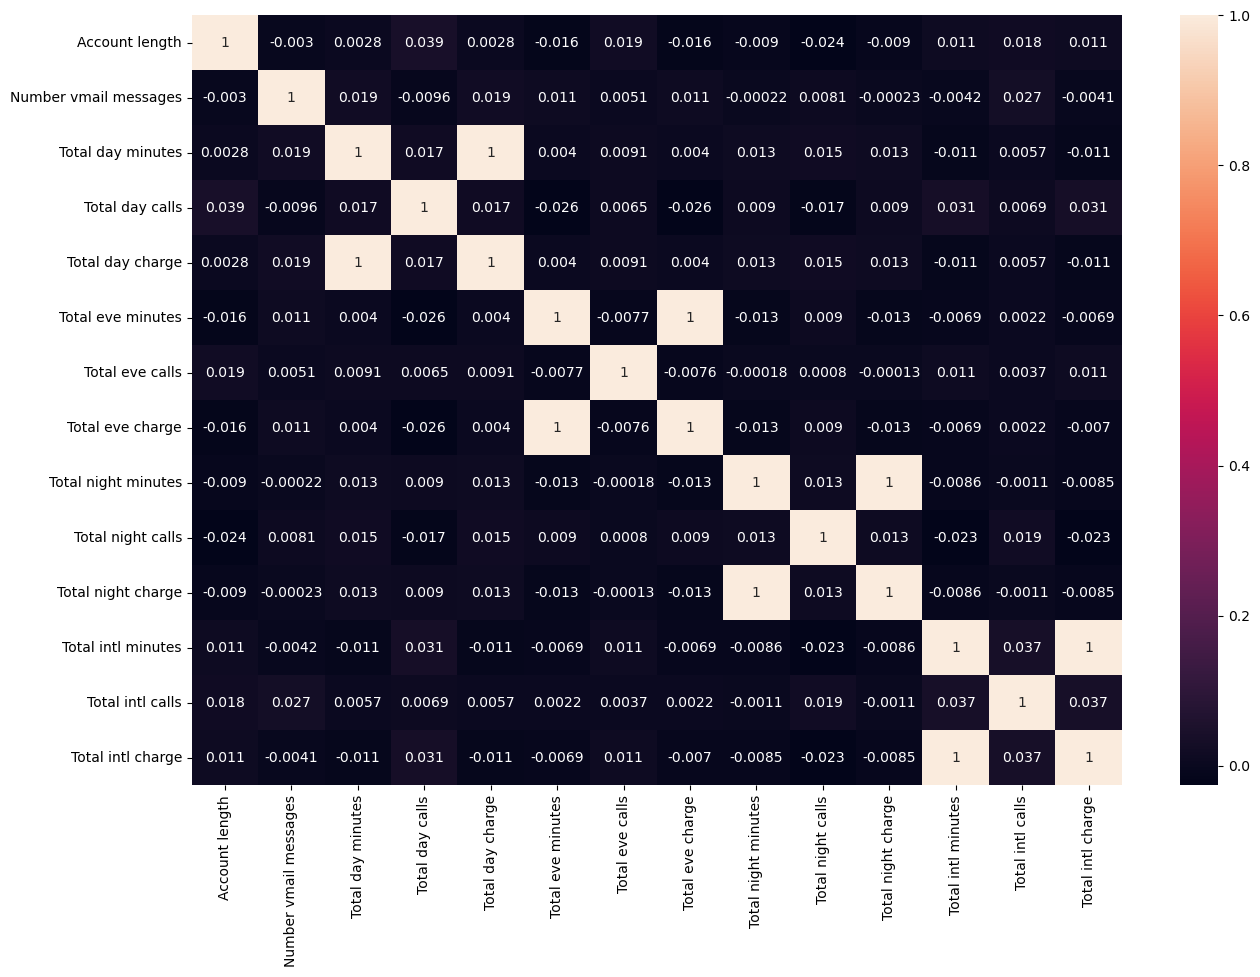

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df[num_cols].corr(), annot = True)

On peut remarquer un problème de corrélation entre certaines variables que nous devons résoudre !

<Axes: >

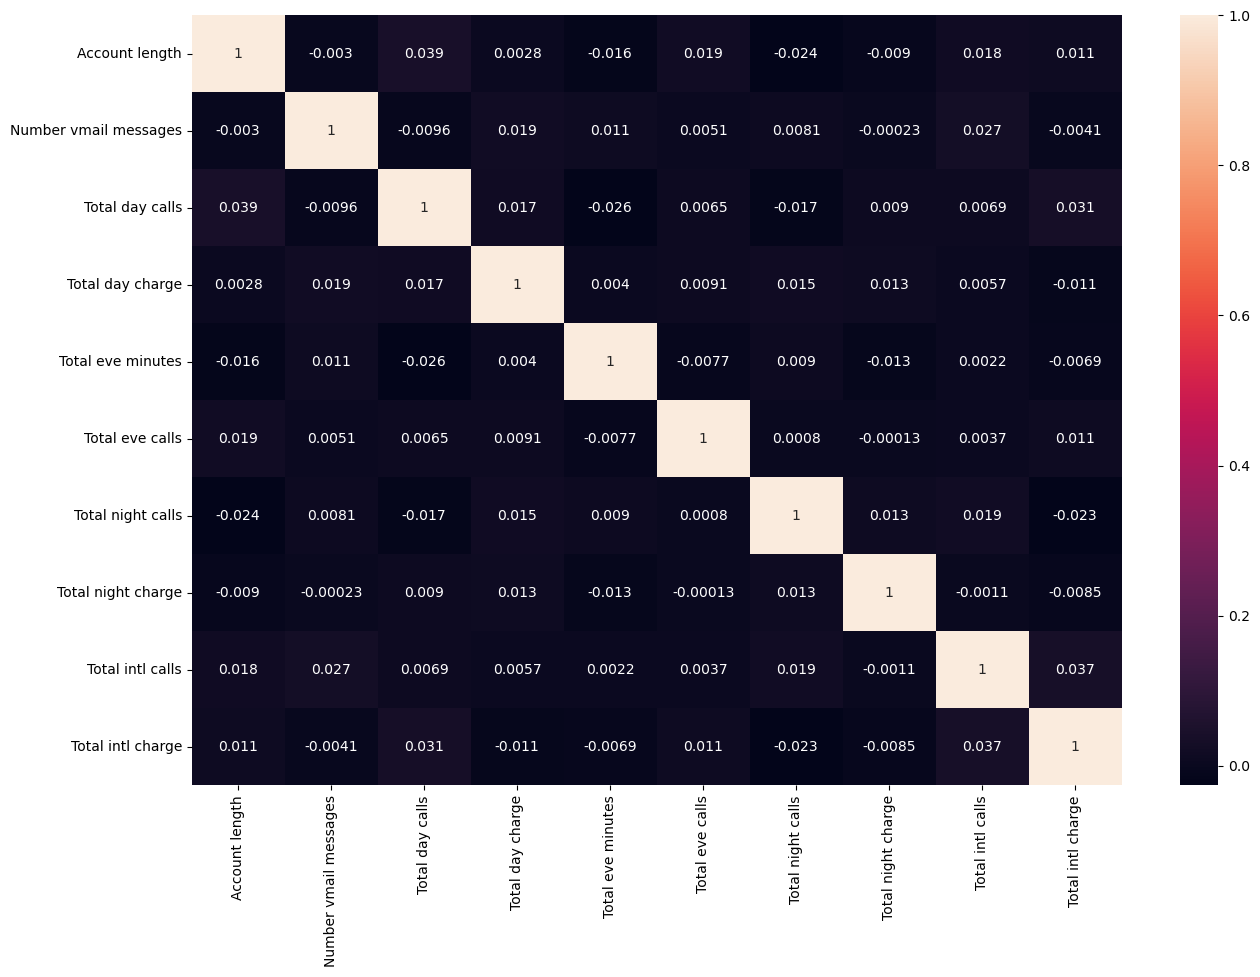

In [21]:
to_drop = ["Total day minutes", "Total eve charge", "Total night minutes", "Total intl minutes"]
plt.figure(figsize = (15,10))
sns.heatmap(df[num_cols].drop(to_drop, axis = 1).corr(), annot = True)

In [22]:
df.replace(["No","Yes"],[0,1], inplace = True)
df.replace([False,True],[0,1], inplace = True)

In [23]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)


### Création du modéle

On commence par créer un "Transformer" adapté aux données pour le réetuliser dans la partie de validation

In [25]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self,to_drop):
        self.to_drop = to_drop
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["Total number of minutes"] = X["Total day minutes"] + X["Total eve minutes"] + X["Total night minutes"]
        X["Total minutes per call"] = (X["Total number of minutes"]) / (X["Total day calls"] + X["Total eve calls"] + X["Total night calls"])
        X["Average charge per call"] = (X["Total day charge"] + X["Total eve charge"] + X["Total night charge"]) / (X["Total number of minutes"])
        X["International usage rate"] = (X["Total intl minutes"]) / (X["Total number of minutes"])
        
        return X.drop(self.to_drop, axis = 1)

Nous définissons également un transformateur de mise à l'échelle utilisé pour mettre à l'échelle les colonnes numériques et encoder les colonnes catégoriques non ordinales .

In [26]:
class Scaling(BaseEstimator, TransformerMixin):
    def __init__(self,num_columns,cat_columns,onehot_columns, scaler=StandardScaler()):
        self.scaler = scaler
        self.num_columns = num_columns
        self.cat_columns = cat_columns
        self.onehot_columns = onehot_columns
    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.num_columns]),
                                columns=X[self.num_columns].columns,
                                index=X[self.num_columns].index)
        dummies = pd.get_dummies(X[self.onehot_columns].astype("object")).iloc[:,:2]
        X = pd.concat([X[self.cat_columns],X_scaled], axis = 1)
        X = pd.concat([X,dummies], axis = 1)
        return X

In [27]:
cat_cols =["State","International plan","Voice mail plan", "Customer service calls"]
one_hot_col = ["Area code"]
num_cols = ["Account length",
    "Number vmail messages",
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total night calls',
    'Total night charge',
    'Total intl calls',
    'Total intl charge',
    "Total number of minutes",
    "Total minutes per call",
    "Average charge per call",
    "International usage rate"]

In [28]:
pipeline = Pipeline(steps=[('feature_creation', FeatureCreator(to_drop)),('scaling', Scaling(num_cols,cat_cols,one_hot_col))])

In [29]:
X_train_wf = pipeline.fit_transform(X_train)
X_test_wf = pipeline.transform(X_test)

In [30]:
def train_predict(X_train,X_test,y_train,y_test, model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

### Sélection des variables à l'aide de SelectKBest

In [31]:
cols = cat_cols + ["Area code_408", "Area code_415"]
cat_selector = SelectKBest(chi2, k=2)
X_new = cat_selector.fit_transform(X_train_wf[cols], y_train)

In [32]:
selected_features = [X_train_wf[cols].columns[cat_selector.get_support()][0],
                     X_train_wf[cols].columns[cat_selector.get_support()][1]]
print(f"Selected features are : {X_train_wf[cols].columns[cat_selector.get_support()][0]} and {X_train_wf[cols].columns[cat_selector.get_support()][1]}") 

Selected features are : International plan and Customer service calls


In [33]:
num_selector = SelectKBest(f_classif, k=5)
X_new = num_selector.fit_transform(X_train_wf[num_cols], y_train)

In [34]:
for i in range(5): 
    print(f"Feature {i+1} is {X_train_wf[num_cols].columns[num_selector.get_support()][i]}")
    selected_features +=[X_train_wf[num_cols].columns[num_selector.get_support()][i]]

Feature 1 is Total day charge
Feature 2 is Total intl charge
Feature 3 is Total number of minutes
Feature 4 is Total minutes per call
Feature 5 is Average charge per call


In [35]:
X_train_wf['Area code_408'] = X_train_wf['Area code_408'].astype(int)
X_train_wf['Area code_415'] = X_train_wf['Area code_415'].astype(int)

In [36]:
# train model without selection: 
log_reg = sm.Logit(y_train, X_train_wf).fit()
# train model with selection : 
log_reg_ws = sm.Logit(y_train, X_train_wf[selected_features]).fit()

Optimization terminated successfully.
         Current function value: 0.321233
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.556424
         Iterations 6


In [37]:
log_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2132
Model:                          Logit   Df Residuals:                     2112
Method:                           MLE   Df Model:                           19
Date:                Sun, 05 May 2024   Pseudo R-squ.:                  0.2253
Time:                        09:49:43   Log-Likelihood:                -684.87
converged:                       True   LL-Null:                       -884.04
Covariance Type:            nonrobust   LLR p-value:                 9.708e-73
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
State                        0.2085      0.092      2.269      0.023       0.028       0.389
International plan           2.0932      0.189     11.078      0.000       1.723       2.464
Voice mail plan            -10.9947      0.750    -14.660      0.000     -12.465      -9.525
Customer service calls       0.3740      0.048      7.729      0.000       0.279       0.469
Account length               0.0209      0.069      0.303      0.762      -0.114       0.156
Number vmail messages        3.9488      0.277     14.241      0.000       3.405       4.492
Total day calls             -0.0196      0.197     -0.100      0.920      -0.405       0.366
Total day charge             2.2052     57.987      0.038      0.970    -111.448     115.859
Total eve minutes           -1.3912     54.839     -0.025      0.980    -108.874     106.092
Total eve calls             -0.0687      0.197     -0.348      0.728      -0.455       0.318
Total night calls           -0.0210      0.190     -0.110      0.912      -0.394       0.352
Total night charge          -2.8889     54.350     -0.053      0.958    -109.413     103.636
Total intl calls            -0.2298      0.076     -3.006      0.003      -0.380      -0.080
Total intl charge           -0.5569      0.302     -1.844      0.065      -1.149       0.035
Total number of minutes      2.9174     97.700      0.030      0.976    -188.572     194.406
Total minutes per call      -0.2718      0.511     -0.532      0.595      -1.274       0.730
Average charge per call     -3.5840      0.435     -8.238      0.000      -4.437      -2.731
International usage rate     1.0542      0.368      2.863      0.004       0.332       1.776
Area code_408               -0.7648      0.186     -4.109      0.000      -1.130      -0.400
Area code_415               -0.6866      0.153     -4.493      0.000      -0.986      -0.387
============================================================================================
"""

In [38]:
print("AIC:", log_reg.aic)
print("BIC:", log_reg.bic)

AIC: 1409.736672418203
BIC: 1523.0329881239177


In [39]:
log_reg_ws.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2132
Model:                          Logit   Df Residuals:                     2125
Method:                           MLE   Df Model:                            6
Date:                Sun, 05 May 2024   Pseudo R-squ.:                 -0.3419
Time:                        09:49:43   Log-Likelihood:                -1186.3
converged:                       True   LL-Null:                       -884.04
Covariance Type:            nonrobust   LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
International plan          0.5244      0.155      3.377      0.001       0.220       0.829
Customer service calls     -0.6128      0.033    -18.844      0.000      -0.676      -0.549
Total day charge            0.9444      0.186      5.077      0.000       0.580       1.309
Total intl charge           0.1831      0.051      3.604      0.000       0.084       0.283
Total number of minutes    -0.1671      0.127     -1.316      0.188      -0.416       0.082
Total minutes per call     -0.0275      0.081     -0.339      0.735      -0.187       0.132
Average charge per call    -0.5890      0.150     -3.928      0.000      -0.883      -0.295
===========================================================================================
"""

In [40]:
print("AIC:", log_reg_ws.aic)
print("BIC:", log_reg_ws.bic)

AIC: 2386.5915692285307
BIC: 2426.245279725531


In [41]:
feature_scores = cat_selector.scores_


In [42]:
sorted_feature_indices = feature_scores.argsort()[::-1]
sorted_feature_names = X_train_wf[cols].columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})

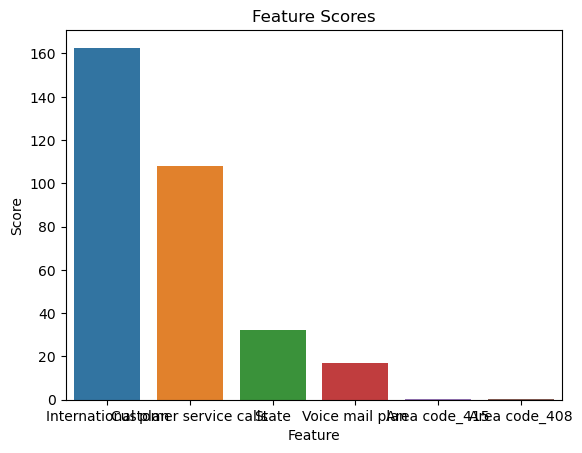

In [43]:
sns.barplot(x='Feature', y='Score', data=feature_scores_df, order=sorted_feature_names)

# Get the current axes (if not already defined)
ax = plt.gca()

# Set labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')

# Show the plot
plt.show()

In [44]:
feature_scores = num_selector.scores_
sorted_feature_indices = feature_scores.argsort()[::-1]
sorted_feature_names = X_train_wf[num_cols].columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})

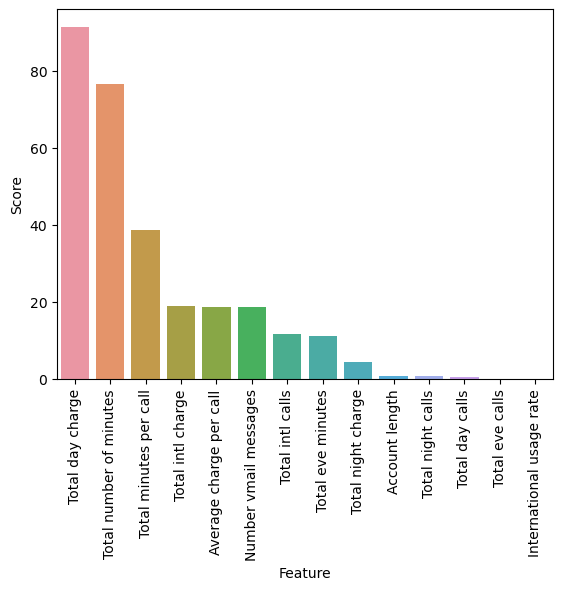

In [45]:
sns.barplot(x='Feature', y='Score', data=feature_scores_df, order=sorted_feature_names)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')
plt.xticks(rotation=90)
plt.show()

### Sélection des variables à l'aide de RFECV:


In [46]:
lr = LogisticRegression()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [47]:
models = [("Logistic Regression", lr),("Decision Tree", tree_clf), ("Random Forest", rf_clf)]
d = {}
for model in models: 
    rfecv = RFECV(estimator=model[1], cv=5,scoring='f1', step=1)
    rfecv = rfecv.fit(X_train_wf, y_train)
    d[model[0]] = X_train_wf.columns[rfecv.support_]
    print('Optimal number of features for :', rfecv.n_features_)
    print('Best features :', X_train_wf.columns[rfecv.support_])

Optimal number of features for : 15
Best features : Index(['State', 'International plan', 'Voice mail plan',
       'Customer service calls', 'Total day charge', 'Total eve minutes',
       'Total night charge', 'Total intl calls', 'Total intl charge',
       'Total number of minutes', 'Total minutes per call',
       'Average charge per call', 'International usage rate', 'Area code_408',
       'Area code_415'],
      dtype='object')
Optimal number of features for : 11
Best features : Index(['International plan', 'Voice mail plan', 'Customer service calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total intl calls', 'Total intl charge', 'Total number of minutes',
       'Total minutes per call', 'Average charge per call'],
      dtype='object')
Optimal number of features for : 19
Best features : Index(['State', 'International plan', 'Voice mail plan',
       'Customer service calls', 'Account length', 'Number vmail messages',
       'Total day calls',

In [48]:
kfold = StratifiedKFold(n_splits = 5)


In [49]:
accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []

for model in models :
    cols = d[model[0]]
    y_pred = cross_val_predict(model[1],X_train_wf[cols],y_train, cv = kfold)
    accuracy.append(accuracy_score(y_pred,y_train))
    precision.append(precision_score(y_pred,y_train))
    recall.append(recall_score(y_pred,y_train))
    f1.append(f1_score(y_pred,y_train))
    f2.append(fbeta_score(y_pred,y_train, beta = 2))
    roc_auc.append(roc_auc_score(y_pred,y_train))

In [50]:
index = list(d.keys())
df = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2, "roc_auc" : roc_auc})
df.index = index

In [51]:
df.sort_values(["f2"], ascending = False)


,Accuracy,Precision,Recall,f1,f2,roc_auc
Random Forest,0.954034,0.712903,0.960870,0.818519,0.898374,0.957038
Decision Tree,0.930582,0.741935,0.771812,0.756579,0.765646,0.864096
Logistic Regression,0.883677,0.361290,0.691358,0.474576,0.584551,0.795425


In [52]:
def plot_roc_curve(y_test,y_pred, ax):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("False positve rate")
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')
    ax.legend(loc='lower right')

In [53]:
def plot_precision_recall(y_test,X_test, model, ax):
    y_pred = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ax.plot(recall, precision)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


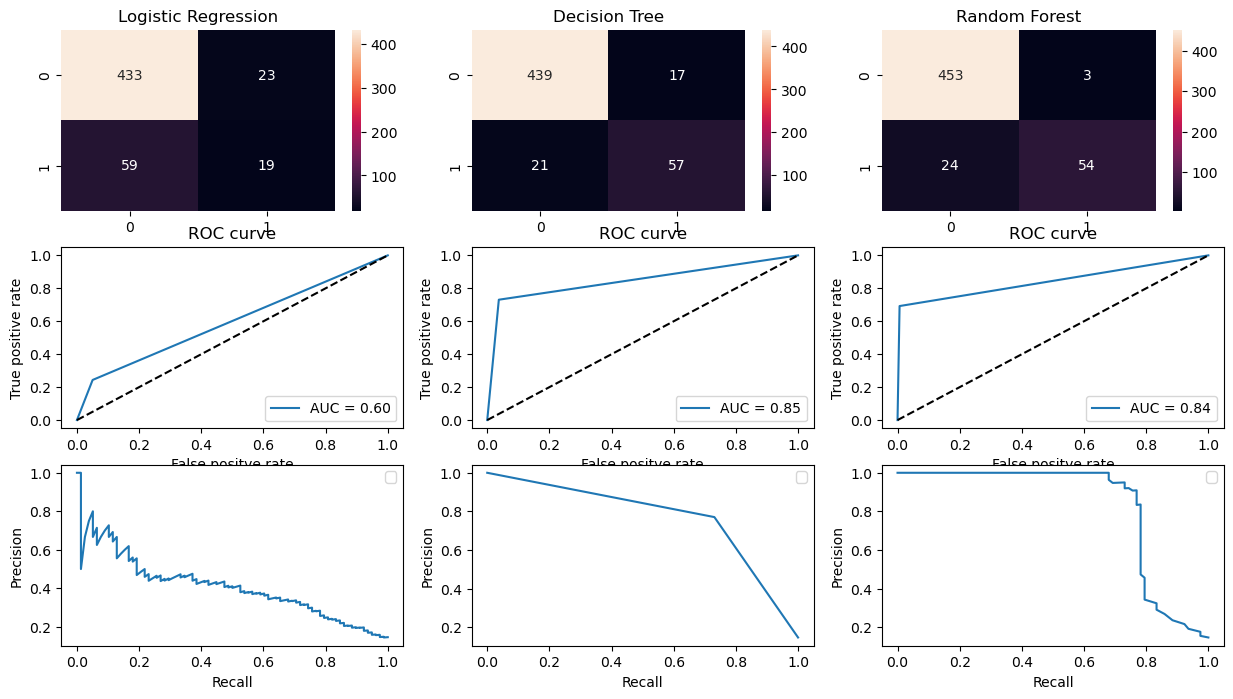

In [54]:
fig,ax = plt.subplots(3,3, figsize = (15,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    cols = d[model[0]]
    y_pred = train_predict(X_train_wf[cols], X_test_wf[cols], y_train,y_test, model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])
    plot_precision_recall(y_test,X_test_wf[cols], model[1], ax[2,i])

### Optimisation et visualisation d'un arbre de décision 

In [55]:
tree_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'max_leaf_nodes': [None,10,14],
    'min_samples_leaf': [2, 4,8]

}

grid = GridSearchCV(tree_clf, param_grid, cv=5)
grid.fit(X_train_wf[d["Decision Tree"]], y_train)
best_tree = grid.best_estimator_

print(grid.best_params_, "\n", grid.best_score_)

{'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 4} 
 0.9465327484029862


In [56]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train_wf[d["Decision Tree"]], y_train)

DecisionTreeClassifier(max_depth=3)

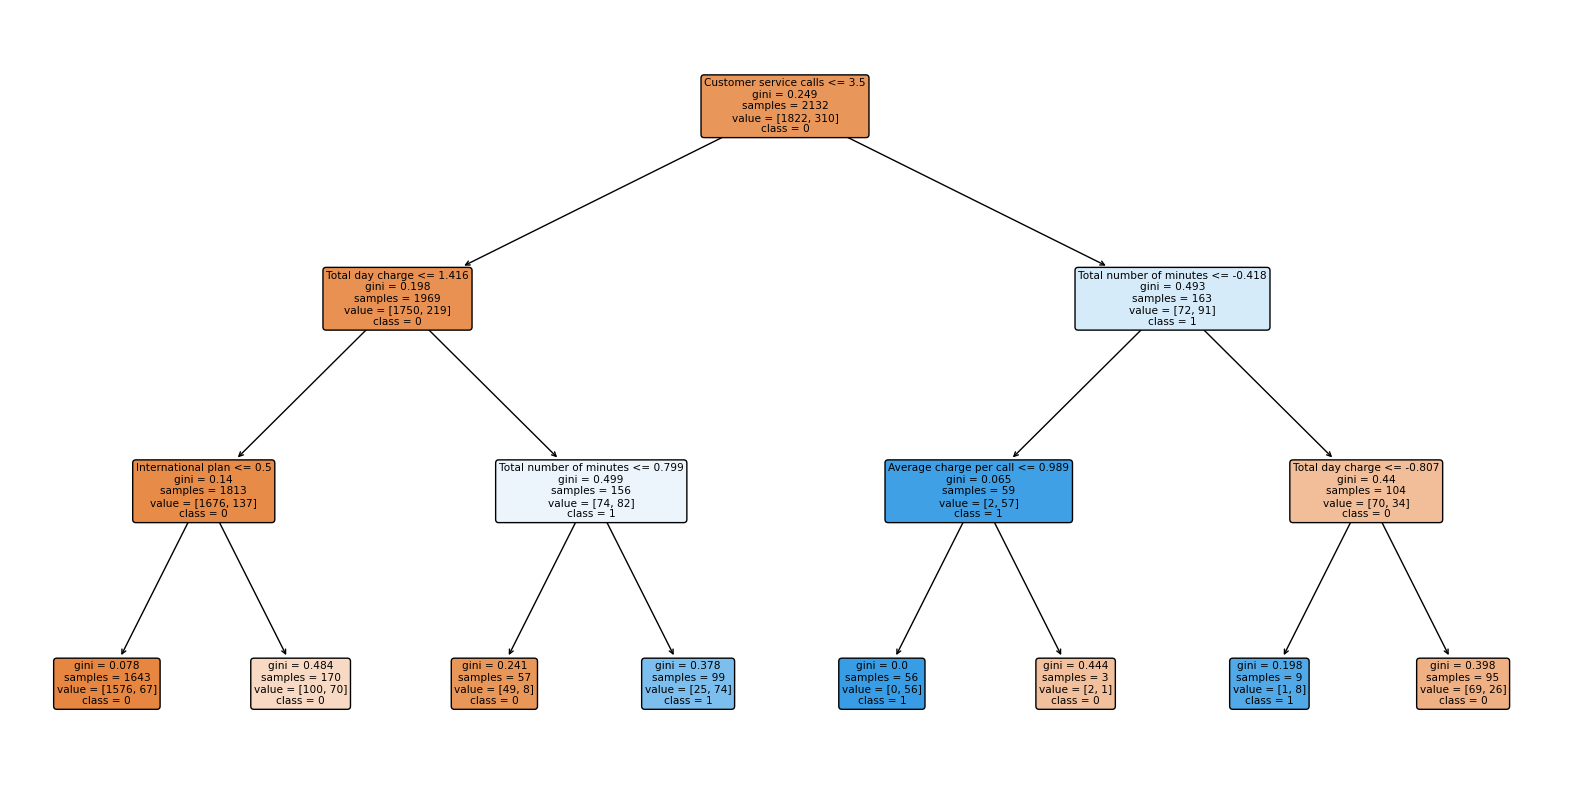

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names_list = list(X_train_wf[d["Decision Tree"]].columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=feature_names_list, class_names=['0', '1'], filled=True, rounded=True)
plt.show()



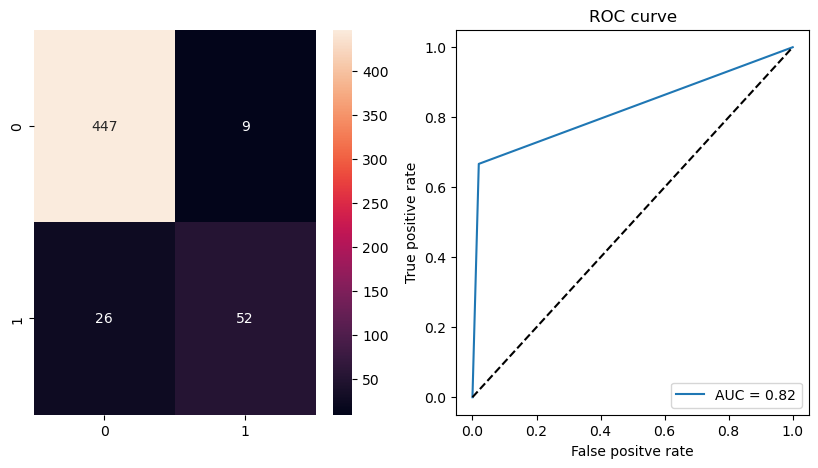

In [58]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
cols = d["Decision Tree"]
y_pred = train_predict(X_train_wf[cols], X_test_wf[cols], y_train,y_test, best_tree)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', ax = ax[0])
plot_roc_curve(y_test,y_pred, ax[1])

In [59]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_wf[d["Decision Tree"]], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

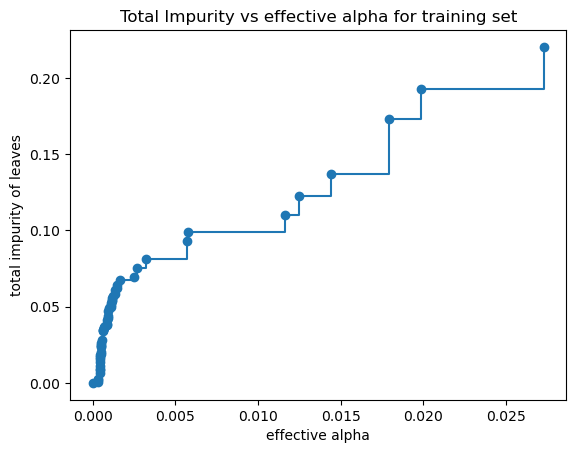

In [60]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train_wf[d["Decision Tree"]], y_train)
    clfs.append(clf)

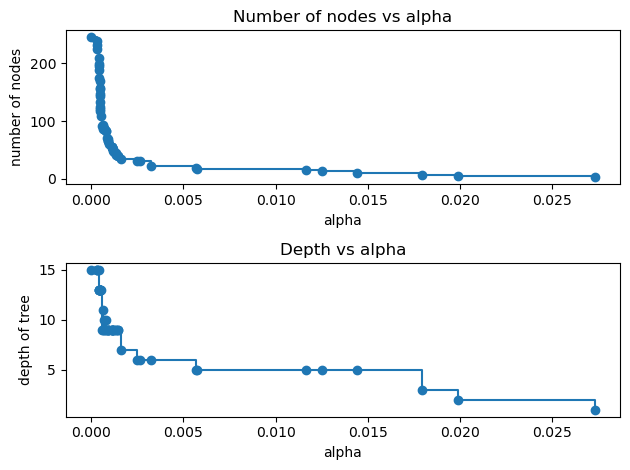

In [62]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

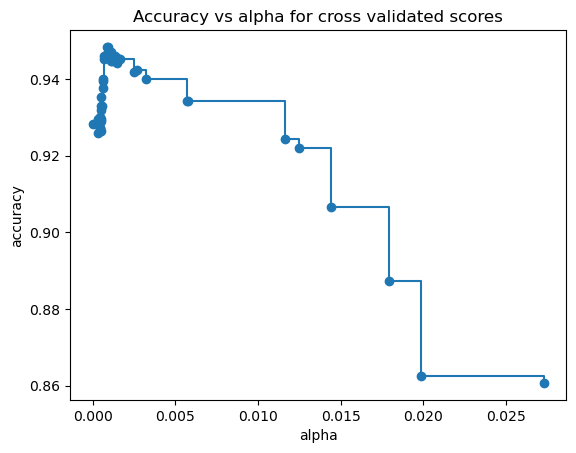

In [63]:
cross_val_scores = [cross_val_score(clf,X_train_wf[d["Decision Tree"]], y_train, cv = 5).mean() for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for cross validated scores")
ax.plot(ccp_alphas, cross_val_scores, marker="o", label="cross_validated_score", drawstyle="steps-post")

plt.show()

In [64]:
index = cross_val_scores.index(max(cross_val_scores))


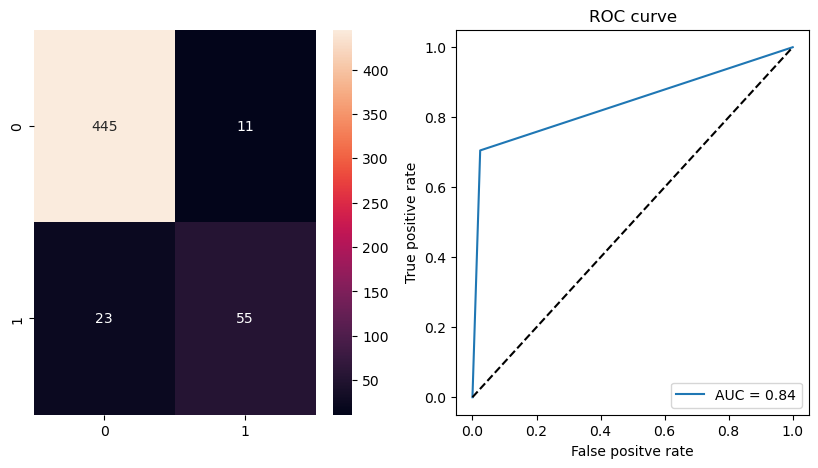

In [65]:
# Train with the model with the maximum cross validation score

clf = DecisionTreeClassifier(ccp_alpha=ccp_alphas[index])
fig, ax = plt.subplots(1,2, figsize = (10,5))
cols = d["Decision Tree"]
y_pred = train_predict(X_train_wf[cols], X_test_wf[cols], y_train,y_test, clf)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', ax = ax[0])
plot_roc_curve(y_test,y_pred, ax[1])

In [66]:
rfc_clf = RandomForestClassifier()

rf_param_grid = {"max_features": [3,10,15],
              "min_samples_split": [5,10],
              "n_estimators" :[500,1000]}


grid = RandomizedSearchCV(rfc_clf,rf_param_grid, n_iter=10, cv=kfold, scoring="f1", n_jobs= 4)

grid.fit(X_train_wf,y_train)

rfc_best = grid.best_estimator_

# Best score
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500, 'min_samples_split': 5, 'max_features': 10}
0.8486248017826352


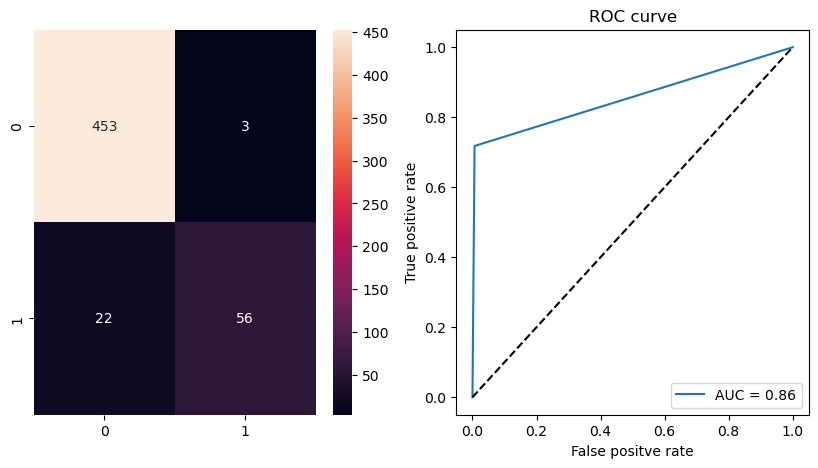

In [67]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
cols = d["Random Forest"]
y_pred = train_predict(X_train_wf[cols], X_test_wf[cols], y_train,y_test, rfc_best)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', ax = ax[0])
plot_roc_curve(y_test,y_pred, ax[1])

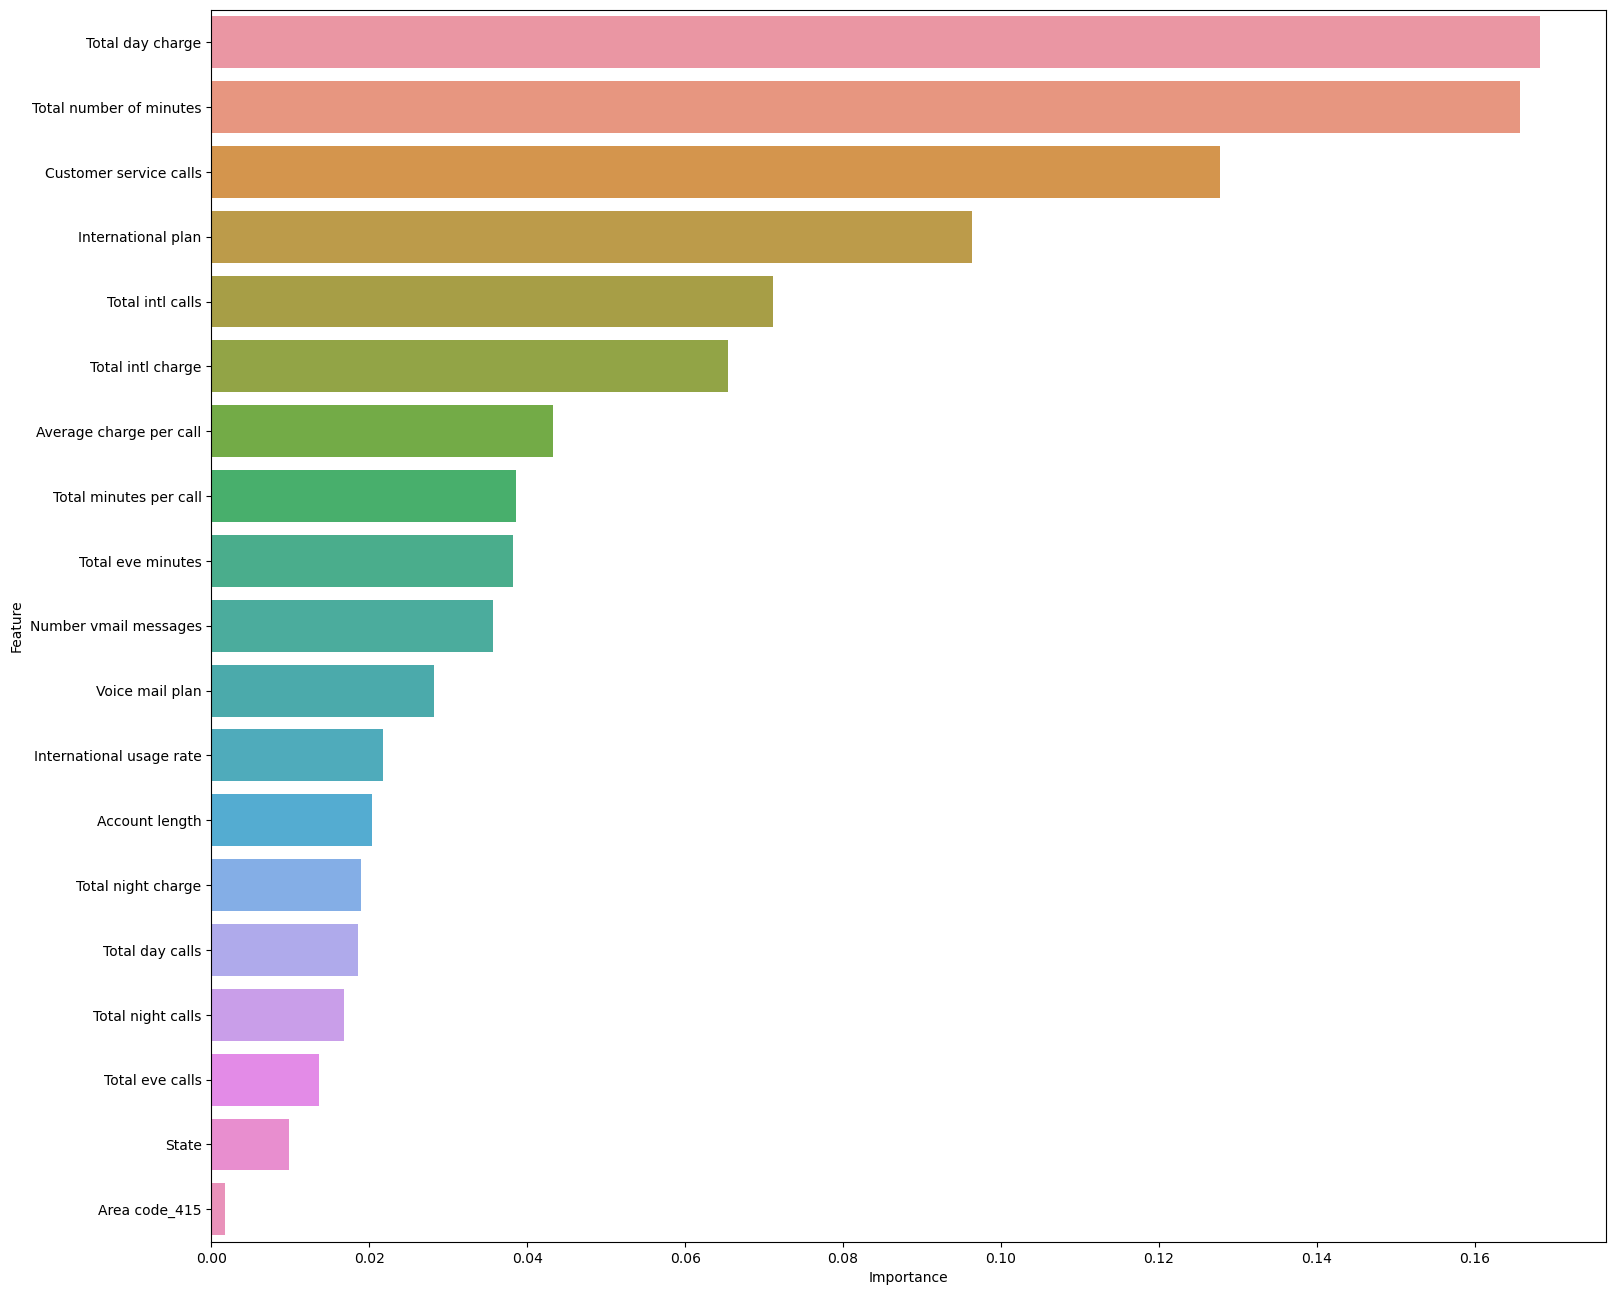

In [68]:
y_pred = train_predict(X_train_wf[cols],X_test_wf[cols],y_train,y_test,model = rfc_best)
importances = rfc_best.feature_importances_
importances_df = pd.DataFrame({"Feature": X_train_wf[cols].columns,
                               "Importance": importances})

importances_df = importances_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(18, 16))

sns.barplot(x="Importance", y="Feature", data=importances_df)
plt.show()

### Evaluation du modéle 

In [69]:
test_path = "churn-bigml-20.csv"
test_set = pd.read_csv(test_path)

In [70]:
X_test = test_set.drop("Churn", axis = 1)
y_test = test_set["Churn"]

In [71]:
X_test["State"].replace(churn_less10,0, inplace = True)
X_test["State"].replace(churn_more10,1, inplace = True)
X_test["State"].replace(churn_more20,2, inplace = True)
X_test["State"]
X_test["State"].unique()


array([0, 1, 2], dtype=int64)

In [72]:
X_test.replace(["No","Yes"],[0,1], inplace = True)
X_test.replace([False,True],[0,1], inplace = True)

In [73]:
X_test["Customer service calls"]=np.where(X_test["Customer service calls"] >= 4, 1,0 )

In [74]:
X_train = pipeline.fit_transform(X)
X_test = pipeline.transform(X_test)

In [75]:
y.value_counts()


Churn
0    2278
1     388
Name: count, dtype: int64

In [76]:
X_un,y_un = shuffle(X_train,y)

# amount of fraud classe: 388 rows.
X_churn = X_un.loc[y_un == 1]
X_non_churn = X_un.loc[y_un == 0][:388]

y_churn = y_un.loc[y_un == 1]
y_non_churn = y_un.loc[y_un == 0][:388]

X_undersampled = pd.concat([X_churn, X_non_churn])
y_undersampled = pd.concat([y_churn, y_non_churn])

In [77]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 2278, 1: 2278})


In [78]:
cat_cols = [0,1,2,17,18]
smote = SMOTENC(cat_cols,random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 2278, 1: 2278})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


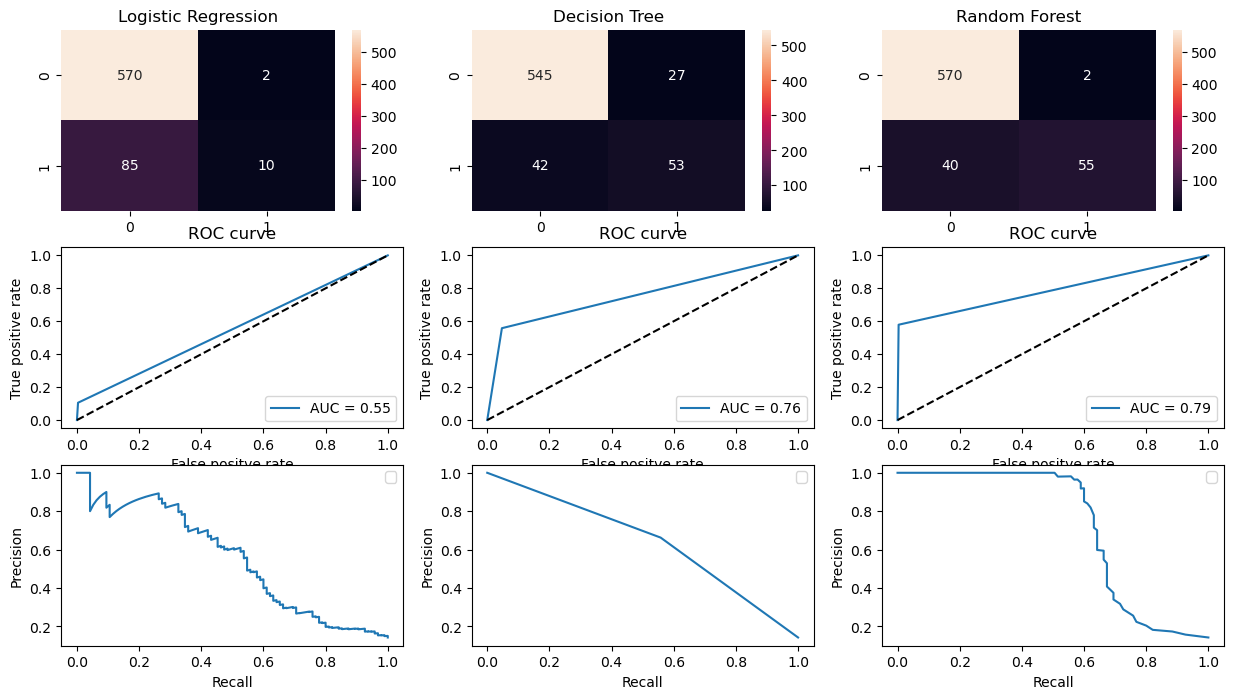

In [79]:
fig,ax = plt.subplots(3,3, figsize = (15,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    cols = d[model[0]]
    
    y_pred = train_predict(X_train[cols],X_test[cols],y,y_test,model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])
    plot_precision_recall(y_test,X_test[cols], model[1], ax[2,i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


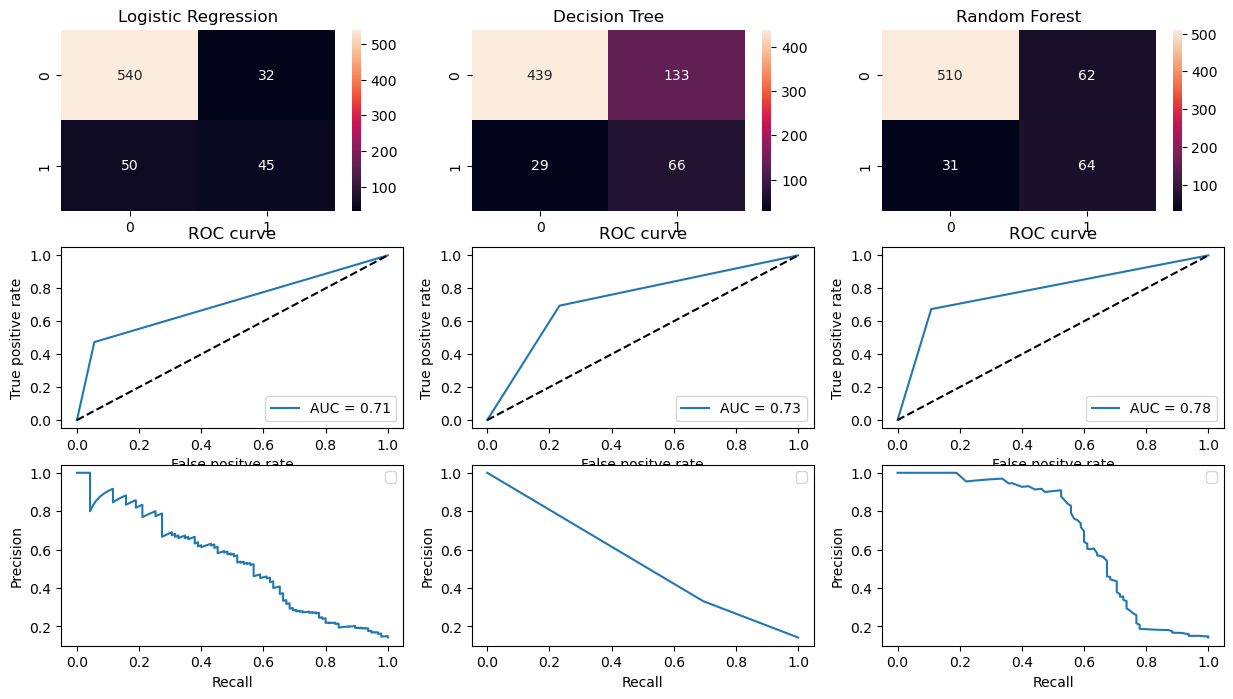

In [80]:
fig,ax = plt.subplots(3,3, figsize = (15,8))
for i,model in enumerate(models):
    cols = d[model[0]]
    ax[0,i].set_title(model[0])
    y_pred = train_predict(X_undersampled[cols],X_test[cols],y_undersampled,y_test,model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])
    plot_precision_recall(y_test,X_test[cols], model[1], ax[2,i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


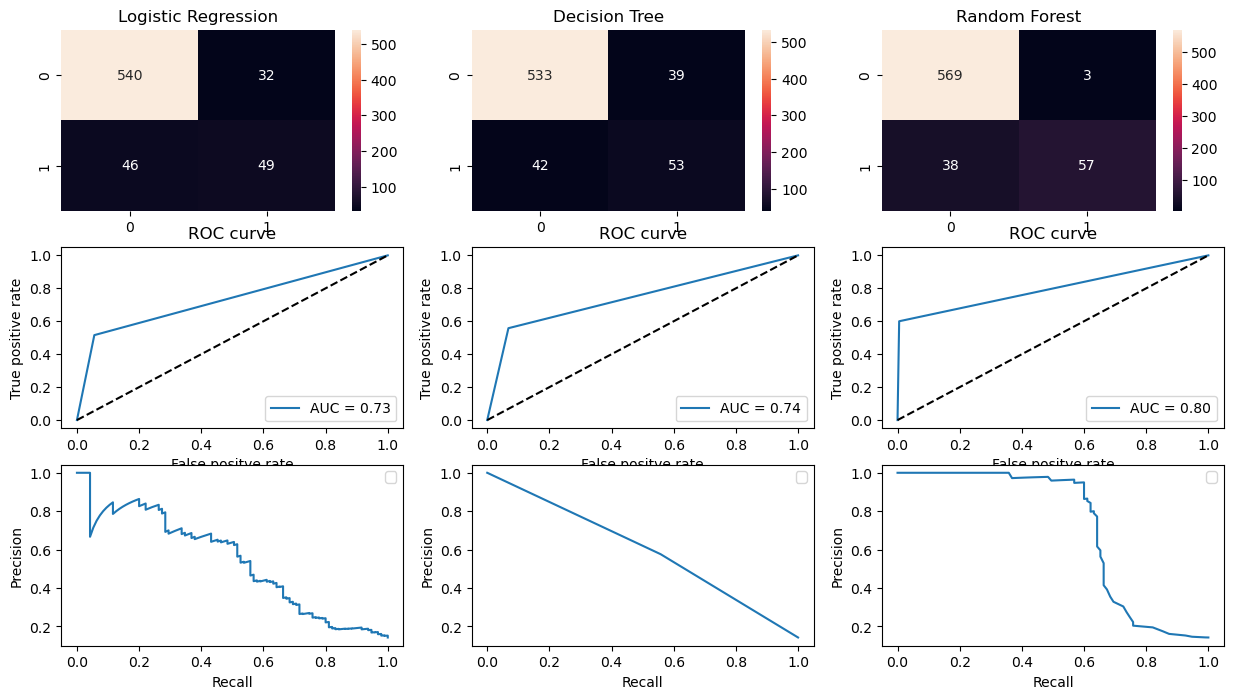

In [81]:
fig,ax = plt.subplots(3,3, figsize = (15,8))
for i,model in enumerate(models):
    cols = d[model[0]]
    ax[0,i].set_title(model[0])
    y_pred = train_predict(X_resampled[cols],X_test[cols],y_resampled,y_test,model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])
    plot_precision_recall(y_test,X_test[cols], model[1], ax[2,i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


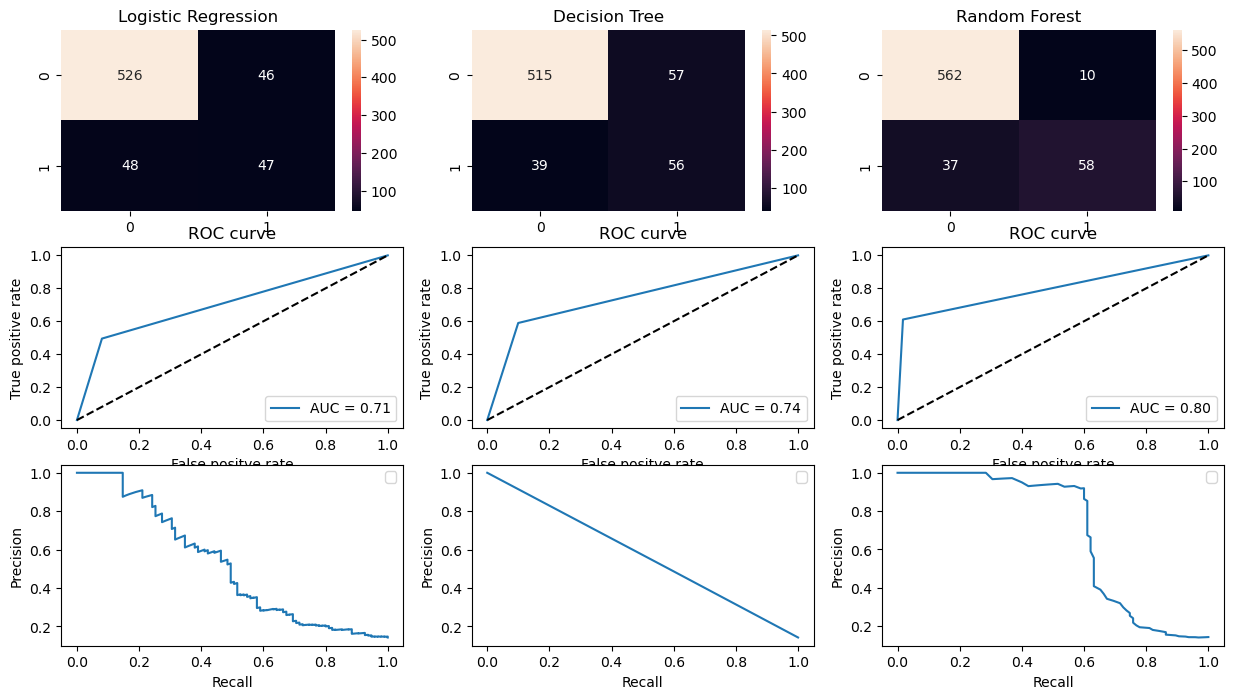

In [82]:
fig,ax = plt.subplots(3,3, figsize = (15,8))
for i,model in enumerate(models):
    cols = d[model[0]]
    ax[0,i].set_title(model[0])
    y_pred = train_predict(X_smote[cols],X_test[cols],y_smote,y_test,model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])
    plot_precision_recall(y_test,X_test[cols], model[1], ax[2,i])